# Netflix Case Study

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show\_id:** Unique ID for every Movie / Tv Show  
**Type:** Identifier - A Movie or TV Show  
**Title:** Title of the Movie / Tv Show  
**Director:** Director of the Movie  
**Cast:** Actors involved in the movie/show  
**Country:** Country where the movie/show was produced  
**Date\_added:** Date it was added on Netflix  
**Release\_year:** Actual Release year of the movie/show  
**Rating:** TV Rating of the movie/show  
**Duration:** Total Duration - in minutes or number of seasons  
**Listed\_in:** Genre  
**Description:** The summary description

**Hints**

1.  The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
2.  Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
3.  Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
4.  Start by exploring a few questions: What type of content is available in different countries?
    1.  How has the number of movies released per year changed over the last 20-30 years?
    2.  Comparison of tv shows vs. movies.
    3.  What is the best time to launch a TV show?
    4.  Analysis of actors/directors of different types of shows/movies.
    5.  Does Netflix has more focus on TV Shows than movies in recent years
    6.  Understanding what content is available in different countries

**Evaluation Criteria (100 Points):**

1\. Defining Problem Statement and Analysing basic metrics **(10 Points)**

2\. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary **(10 Points)**

3\. Non-Graphical Analysis: Value counts and unique attributes ​​**(10 Points)**

4\. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis **(10 Points)**

4.2 For categorical variable(s): Boxplot **(10 Points)**

4.3 For correlation: Heatmaps, Pairplots **(10 Points)**

5\. Missing Value & Outlier check (Treatment optional) **(10 Points)**

6\. Insights based on Non-Graphical and Visual Analysis **(10 Points)**

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7\. Business Insights **(10 Points)** - Should include patterns observed in the data along with what you can infer from it

8\. Recommendations **(10 Points)** - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


In [1]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set_style('darkgrid')

## Data Cleaning and Splitting

In [2]:
df=pd.read_csv('./netflix.csv')
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4229,s4230,Movie,Bill Hicks: One Night Stand,John Fortenberry,Bill Hicks,United Kingdom,"December 31, 2018",1991,TV-MA,28 min,Stand-Up Comedy,Bill Hicks remembers a wild night in 1989 and ...
3226,s3227,Movie,The Body Remembers When the World Broke Open,"Elle-Máijá Tailfeathers, Kathleen Hepburn","Violet Nelson, Elle-Máijá Tailfeathers, Charli...","Canada, Norway","November 27, 2019",2019,TV-MA,106 min,"Dramas, Independent Movies","After a traumatic event, two Indigenous women ..."
1195,s1196,Movie,Operation Varsity Blues: The College Admission...,Chris Smith,Matthew Modine,United States,"March 17, 2021",2021,R,100 min,Documentaries,Reenactments drive this documentary investigat...
3496,s3497,Movie,Manmadhudu 2,Rahul Ravindran,"Nagarjuna Akkineni, Rakul Preet Singh, Lakshmi...",India,"September 23, 2019",2019,TV-MA,152 min,"Comedies, Dramas, International Movies","Under pressure to marry, a perennial bachelor ..."
1362,s1363,TV Show,Total Drama,NaN,"Clé Bennett, Christian Potenza, Scott McCord, ...","Canada, United States, France","February 1, 2021",2015,TV-PG,7 Seasons,"Kids' TV, TV Comedies",Heartwarming moments are interspersed with bac...
3129,s3130,TV Show,Crash Landing on You,NaN,"Hyun Bin, Son Ye-jin, Seo Ji-hye, Kim Jung-hyu...",South Korea,"December 15, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A paragliding mishap drops a South Korean heir...
8624,s8625,Movie,Tremors 4: The Legend Begins,S.S. Wilson,"Michael Gross, Sara Botsford, Billy Drago, Bre...",United States,"January 1, 2020",2004,PG-13,101 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",Residents of a abandoned mining town attempt t...
294,s295,Movie,Takizawa Kabuki ZERO 2020 The Movie,Hideaki Takizawa,"Hikaru Iwamoto, Tatsuya Fukazawa, Raul, Shota ...",NaN,"August 7, 2021",2020,TV-PG,139 min,"International Movies, Music & Musicals",Superstar Hideaki Takizawa reimagines his accl...
8284,s8285,Movie,The Dukes of Hazzard,Jay Chandrasekhar,"Johnny Knoxville, Seann William Scott, Jessica...",United States,"January 1, 2020",2005,PG-13,104 min,"Action & Adventure, Comedies",The Duke boys are back in this comedy based on...
5913,s5914,Movie,Chris D'Elia: Incorrigible,Bill D'Elia,Chris D'Elia,United States,"April 17, 2015",2015,TV-MA,84 min,Stand-Up Comedy,Stand-up comedian Chris D'Elia covers everythi...


In [3]:
df = df.drop("description", axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [6]:
df["type"].value_counts()
print("=====================")
df["rating"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [7]:
df["type"]=df["type"].astype("category")

In [8]:
mask=df["rating"].isin(["74 min","84 min","66 min"])
df.loc[mask, "duration"] = df.loc[mask, "rating"]
df.loc[mask, "rating"] = df["rating"].mode().iloc[0]

df["rating"]=df["rating"].fillna(df["rating"].mode().iloc[0])

In [9]:
df["date_added"] = pd.to_datetime(df["date_added"] , format='%B %d, %Y', errors="coerce")
df["date_added_year_month"] = df["date_added"].dt.strftime('%Y-%m')

In [10]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,date_added_year_month
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,2021-09-15,2021,TV-PG,6 Seasons,Reality TV,2021-09
1769,s1770,TV Show,Voice,NaN,"Jang Hyuk, Lee Ha-na, Baek Sung-hyun, Ye-sung,...",South Korea,2020-11-01,2018,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Korean...",2020-11
3013,s3014,TV Show,Tiny House Nation,NaN,NaN,United States,2020-01-17,2019,TV-PG,2 Seasons,Reality TV,2020-01
1959,s1960,Movie,Enola Holmes,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...",United Kingdom,2020-09-23,2020,PG-13,124 min,"Action & Adventure, Children & Family Movies, ...",2020-09
2036,s2037,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers",2020-09
2700,s2701,Movie,Born Beautiful,Perci Intalan,"Martin del Rosario, Lou Veloso, Chai Fonacier,...",Philippines,2020-04-08,2019,TV-MA,96 min,"Comedies, Dramas, International Movies",2020-04
4865,s4866,TV Show,Bill Nye Saves the World,NaN,"Bill Nye, Karlie Kloss, Derek Muller, Emily Ca...",United States,2018-05-11,2018,TV-14,3 Seasons,Stand-Up Comedy & Talk Shows,2018-05
7179,s7180,Movie,Kevin Hart: Let Me Explain,"Leslie Small, Tim Story",Kevin Hart,United States,2018-07-13,2013,R,75 min,Stand-Up Comedy,2018-07
1440,s1441,TV Show,Nailed It! Mexico,NaN,"Omar Chaparro, Anna Ruiz","Mexico, United States",2021-01-05,2021,TV-PG,3 Seasons,"International TV Shows, Reality TV, Spanish-La...",2021-01
1347,s1348,Movie,Black Beach,Esteban Crespo,"Raúl Arévalo, Candela Peña, Paulina García, Cl...","Spain, Belgium, United States",2021-02-03,2020,TV-MA,116 min,"Action & Adventure, International Movies",2021-02


In [11]:
# df.set_index('show_id')['cast'].str.split(', ', expand=True).stack().reset_index(name='cast').drop('level_1', axis=1)

In [12]:
cast=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
cast_df=pd.DataFrame(cast,index=df['show_id'])
cast_df=cast_df.stack().reset_index(name='cast').drop('level_1', axis=1).set_index('show_id')
cast_df.replace("nan", float('nan'), inplace=True)
# mask = cast_df[cast_df['cast'] == ''].index
# cast_df.drop(mask, inplace=True)
cast_df

director=df['director'].apply(lambda x: str(x).split(', ')).tolist()
director_df=pd.DataFrame(director,index=df['show_id'])
director_df=director_df.stack().reset_index(name='director').drop('level_1', axis=1).set_index('show_id')
director_df.replace("nan", float('nan'), inplace=True)
director_df

country=df['country'].apply(lambda x: str(x).split(', ')).tolist()
country_df=pd.DataFrame(country,index=df['show_id'])
country_df=country_df.stack().reset_index(name='country').drop('level_1', axis=1).set_index('show_id')
country_df.replace("nan", float('nan'), inplace=True)
mask = country_df[country_df['country'] == ''].index
country_df.drop(mask, inplace=True)
# country_df.replace(" ", float('nan'), inplace=True)
country_df

listed=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
listed_df=pd.DataFrame(listed,index=df['show_id'])
listed_df=listed_df.stack().reset_index(name='listed_in').drop('level_1', axis=1).set_index('show_id')
listed_df.replace("nan", float('nan'), inplace=True)
listed_df

,cast
show_id,
s1,NaN
s2,Ama Qamata
s2,Khosi Ngema
s2,Gail Mabalane
s2,Thabang Molaba
...,...
s8807,Manish Chaudhary
s8807,Meghna Malik
s8807,Malkeet Rauni


,director
show_id,
s1,Kirsten Johnson
s2,NaN
s3,Julien Leclercq
s4,NaN
s5,NaN
...,...
s8803,David Fincher
s8804,NaN
s8805,Ruben Fleischer


,country
show_id,
s1,United States
s2,South Africa
s3,NaN
s4,NaN
s5,India
...,...
s8803,United States
s8804,NaN
s8805,United States


,listed_in
show_id,
s1,Documentaries
s2,International TV Shows
s2,TV Dramas
s2,TV Mysteries
s3,Crime TV Shows
...,...
s8806,Children & Family Movies
s8806,Comedies
s8807,Dramas


In [13]:
df.drop(["cast","country","director","listed_in"], axis=1, inplace=True)

In [14]:
mask=df["date_added"].isna()

In [15]:
mask

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: date_added, Length: 8807, dtype: bool

In [16]:
df[mask]

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,NaN
6079,s6080,TV Show,Abnormal Summit,NaT,2017,TV-PG,2 Seasons,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaT,2018,TV-PG,5 Seasons,NaN
6177,s6178,TV Show,忍者ハットリくん,NaT,2012,TV-Y7,2 Seasons,NaN
6213,s6214,TV Show,Bad Education,NaT,2014,TV-MA,3 Seasons,NaN
...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,NaT,2010,TV-MA,4 Seasons,NaN
8557,s8558,TV Show,The West Wing,NaT,2005,TV-14,7 Seasons,NaN
8684,s8685,TV Show,Vroomiz,NaT,2016,TV-Y,3 Seasons,NaN
8712,s8713,TV Show,Weird Wonders of the World,NaT,2016,TV-PG,2 Seasons,NaN


In [17]:
import datetime
datetime.date(2006, 1, 1)

datetime.date(2006, 1, 1)

In [18]:
df.loc[mask, "date_added"] = df.loc[mask, "release_year"].apply(lambda x: max(pd.to_datetime(x + 1, format="%Y"), pd.Timestamp(datetime.date(2006, 1, 1))).date() )

In [19]:
df["duration"]=df["duration"].apply(lambda x: x.split(" ")[0])

df["date_added_year"]=df["date_added"].dt.year
df["date_added_month"]=df["date_added"].dt.month
df["date_added_month_name"]=df["date_added"].dt.month_name()

movies_df=df.loc[df["type"]=="Movie"]
tv_shows_df=df.loc[df["type"]=="TV Show"]
movies_df.head()
tv_shows_df.head()

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,2021-09,2021,9,September
7,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125,2021-09,2021,9,September
9,s10,Movie,The Starling,2021-09-24,2021,PG-13,104,2021-09,2021,9,September
12,s13,Movie,Je Suis Karl,2021-09-23,2021,TV-MA,127,2021-09,2021,9,September


,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
5,s6,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September


In [20]:
country_df.value_counts()
print("=====================")
cast_df.value_counts()
print("=====================")
director_df.value_counts()

country       
United States     3689
India             1046
United Kingdom     804
Canada             445
France             392
                  ... 
Kazakhstan           1
Jamaica              1
Slovakia             1
Ethiopia             1
Afghanistan          1
Name: count, Length: 126, dtype: int64

cast               
Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Naseeruddin Shah       32
Takahiro Sakurai       32
                       ..
Chinmay Kambli          1
Kumiko Aso              1
Kumarakom Vasudevan     1
Kumar Varun             1
Ṣọpẹ́ Dìrísù            1
Name: count, Length: 36439, dtype: int64

director               
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Suhas Kadav                16
Marcus Raboy               16
                           ..
Brandon Camp                1
Juan Antin                  1
Juan Antonio de la Riva     1
Juan Camilo Pinzon          1
María Jose Cuevas           1
Name: count, Length: 4993, dtype: int64

In [21]:
country_df["country"].mode().iloc[0]

'United States'

In [22]:
director_df.fillna("Unknown", inplace=True)
cast_df.fillna("Unknown", inplace=True)
country_df=country_df.fillna('Unknown')

In [23]:
country_df.reset_index(inplace=True)
cast_df.reset_index(inplace=True)
listed_df.reset_index(inplace=True)

In [24]:
country_df.isna().sum()
listed_df.isna().sum()
tv_shows_df.isna().sum()
movies_df.isna().sum()
df.isna().sum()
cast_df.isna().sum()

show_id    0
country    0
dtype: int64

show_id      0
listed_in    0
dtype: int64

show_id                   0
type                      0
title                     0
date_added                0
release_year              0
rating                    0
duration                  0
date_added_year_month    98
date_added_year           0
date_added_month          0
date_added_month_name     0
dtype: int64

show_id                  0
type                     0
title                    0
date_added               0
release_year             0
rating                   0
duration                 0
date_added_year_month    0
date_added_year          0
date_added_month         0
date_added_month_name    0
dtype: int64

show_id                   0
type                      0
title                     0
date_added                0
release_year              0
rating                    0
duration                  0
date_added_year_month    98
date_added_year           0
date_added_month          0
date_added_month_name     0
dtype: int64

show_id    0
cast       0
dtype: int64

In [25]:
country_df.to_csv("country.csv", index=False)
cast_df.to_csv("cast.csv", index=False)
listed_df.to_csv("listed.csv", index=False)
df.to_csv("data.csv", index=False)
movies_df.to_csv("movies.csv", index=False)
tv_shows_df.to_csv("tv_shows.csv", index=False)

## EDA

In [2]:
country_df=pd.read_csv("./country.csv")
cast_df=pd.read_csv("./cast.csv")
listed_df=pd.read_csv("./listed.csv")
movies_df=pd.read_csv("./movies.csv", parse_dates=["date_added"])
tv_shows_df=pd.read_csv("./tv_shows.csv")
df=pd.read_csv("./data.csv")

In [3]:
country_df.describe()

,show_id,country
count,10840,10840
unique,8805,127
top,s6234,United States
freq,12,3689


In [28]:
cdf=country_df["country"].value_counts()[:10]
cdf

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             392
Japan              318
Spain              232
South Korea        230
Germany            226
Name: count, dtype: int64

country
Mexico       169
China        162
Australia    160
Egypt        117
Turkey       113
Hong Kong    105
Nigeria      103
Italy        100
Brazil        97
Argentina     91
Name: count, dtype: int64

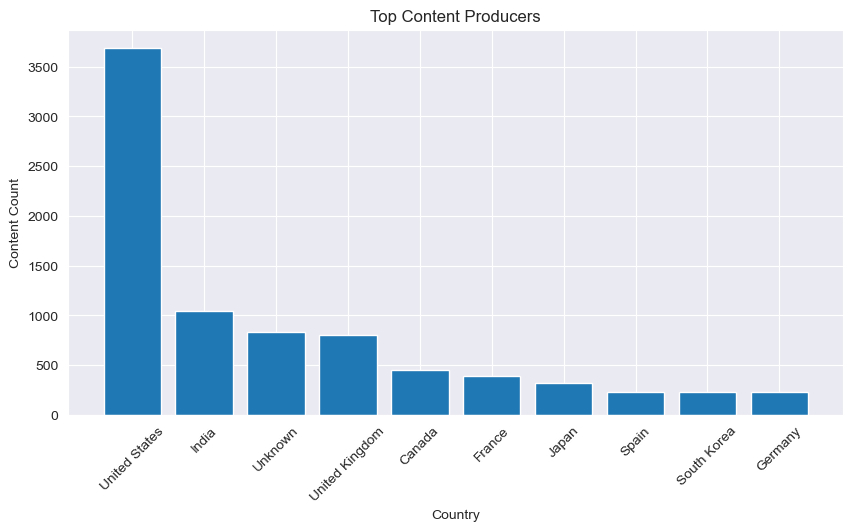

In [29]:
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Top Content Producers");

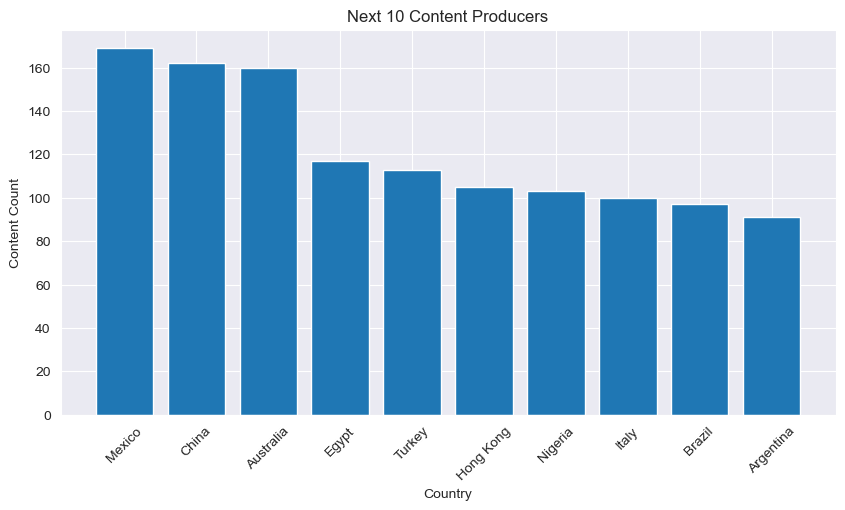

In [7]:
cdf=country_df["country"].value_counts()[10:20]
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Next 10 Content Producers");

In [30]:
cast_df.describe()

,show_id,cast
count,64951,64951
unique,8807,36440
top,s1855,Unknown
freq,50,825


In [31]:
cdf=cast_df["cast"].value_counts()[1:11]
cdf

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64

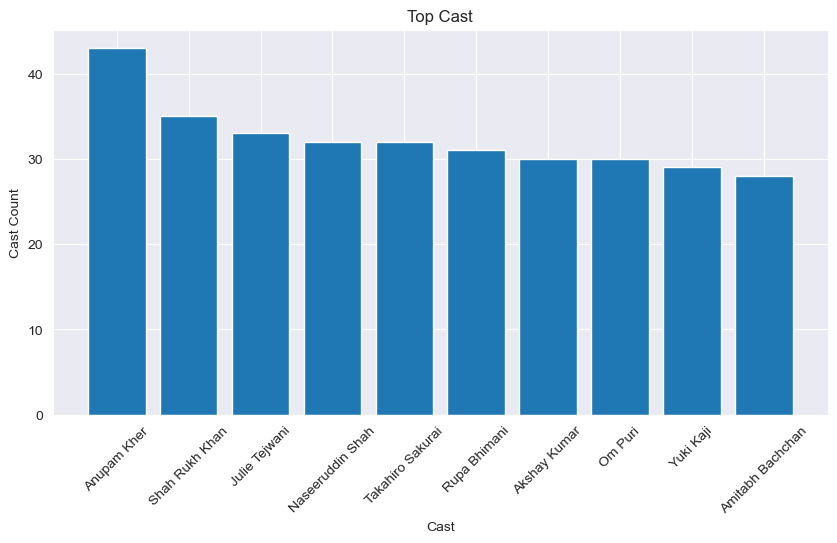

In [32]:
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Cast Count")
plt.xlabel("Cast")
plt.title("Top Cast");

In [33]:
listed_df.describe()

,show_id,listed_in
count,19323,19323
unique,8807,42
top,s8807,International Movies
freq,3,2752


In [34]:
ldf=listed_df["listed_in"].value_counts()[:10]
ldf

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

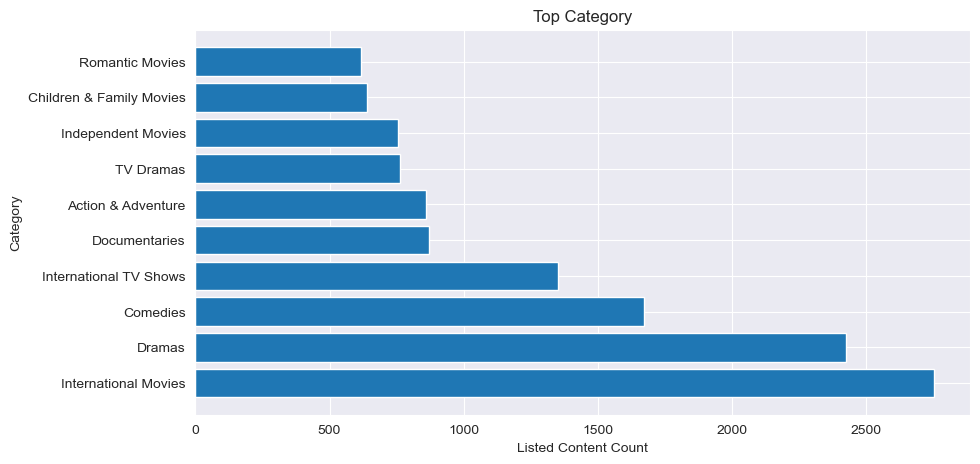

In [35]:
plt.figure(figsize=(10,5))
plt.barh(ldf.index,ldf)
plt.xlabel("Listed Content Count")
plt.ylabel("Category")
plt.title("Top Category");

In [36]:
merge_df=tv_shows_df.merge(listed_df, on='show_id')["listed_in"].value_counts()[:10]
merge_df

listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64

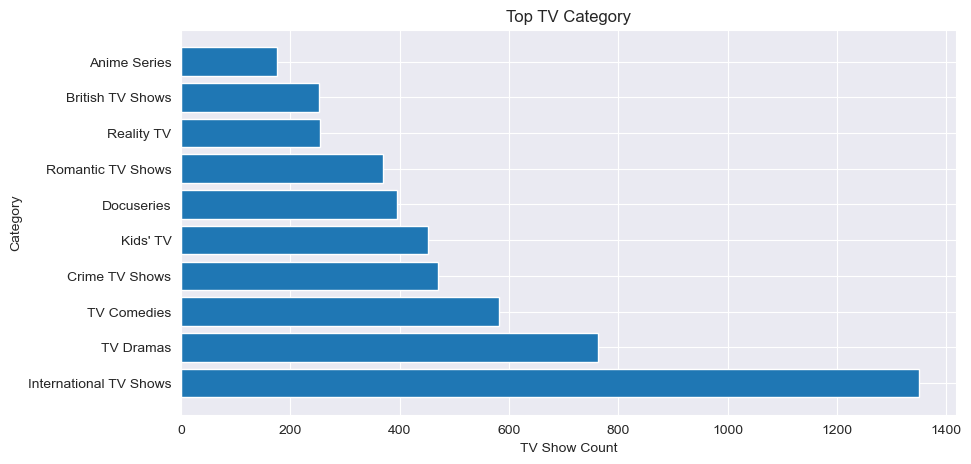

In [37]:
plt.figure(figsize=(10,5))
plt.barh(merge_df.index,merge_df)
plt.xlabel("TV Show Count")
plt.ylabel("Category")
plt.title("Top TV Category");

In [38]:
merge_df=movies_df.merge(listed_df, on='show_id')["listed_in"].value_counts()[:10]
merge_df

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64

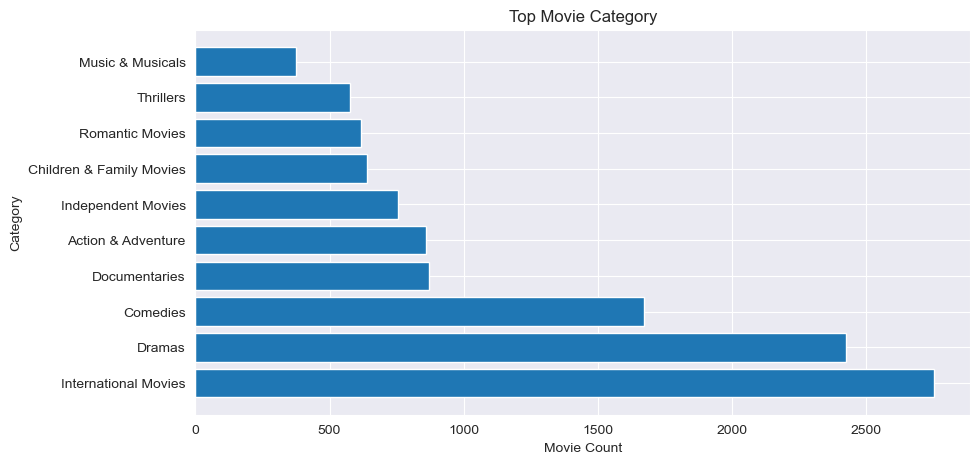

In [39]:
plt.figure(figsize=(10,5))
plt.barh(merge_df.index,merge_df)
plt.xlabel("Movie Count")
plt.ylabel("Category")
plt.title("Top Movie Category");

In [40]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September


In [41]:
stream_timeline=df.groupby(["date_added_year_month","type"])["show_id"].count().reset_index().set_index("date_added_year_month")
stream_timeline.head()

,type,show_id
date_added_year_month,,
2008-01,Movie,1
2008-02,TV Show,1
2009-05,Movie,1
2009-11,Movie,1
2010-11,Movie,1


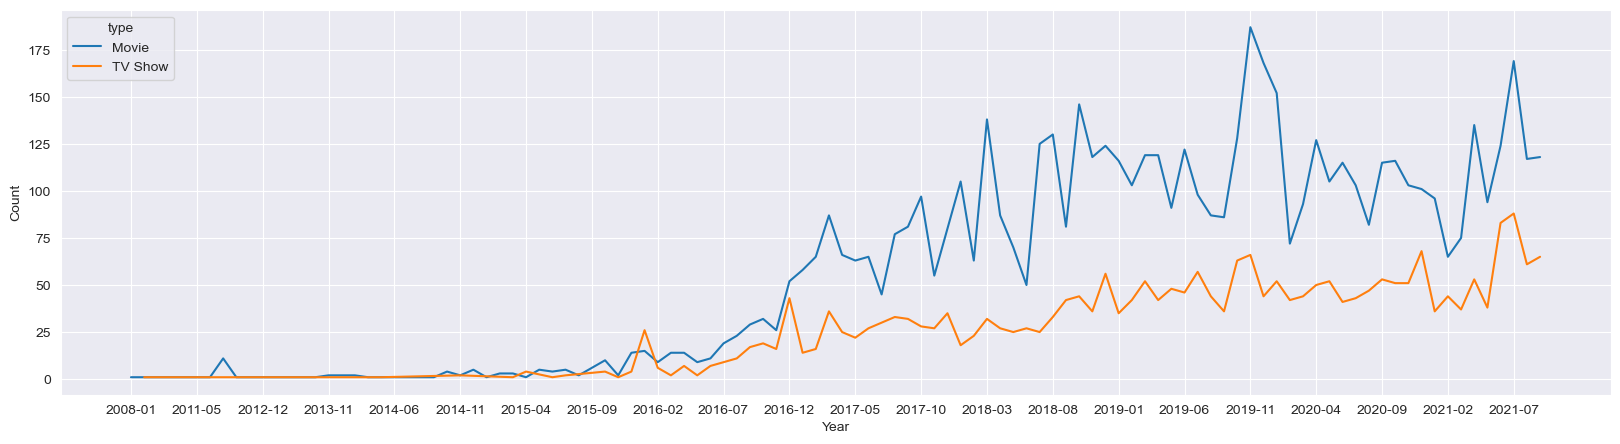

In [43]:
plt.figure(figsize=(20,5))
# fig, ax = plt.subplots(figsize=(20, 5))
l=sns.lineplot(data=stream_timeline, x="date_added_year_month", y="show_id", hue="type")
l.set(xlabel="Year", ylabel="Count");

l.set_xticks(l.get_xticks()[::5]);
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

In [68]:
monthly_release=df.groupby(["date_added_month","date_added_month_name","type"])["show_id"].count().reset_index().set_index("date_added_month")
monthly_release.head()

,date_added_month_name,type,show_id
date_added_month,,,
1,January,Movie,546
1,January,TV Show,279
2,February,Movie,382
2,February,TV Show,175
3,March,Movie,529


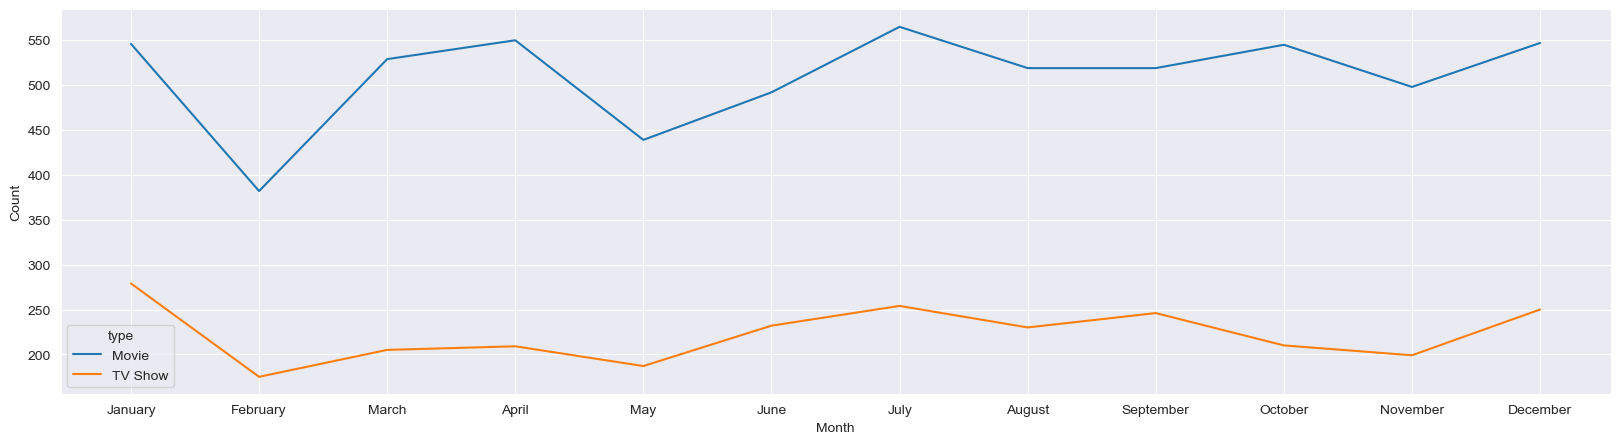

In [69]:
plt.figure(figsize=(20,5))

lp=sns.lineplot(data=monthly_release, x="date_added_month_name", y="show_id", hue="type")
lp.set(xlabel="Month", ylabel="Count");

<Axes: xlabel='type', ylabel='count'>

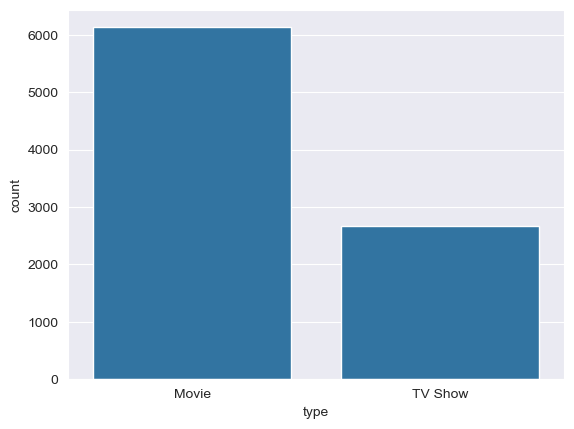

In [46]:
sns.countplot(data=df, x="type")

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='rating', ylabel='count'>

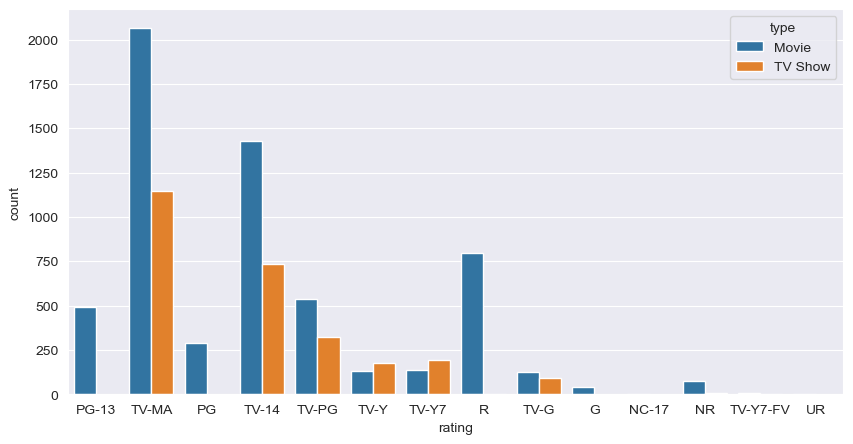

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating", hue="type")

In [88]:
merge_df=movies_df.merge(listed_df, on='show_id', how='inner')
merge_df = merge_df.loc[merge_df['date_added_year'] >= 2014]

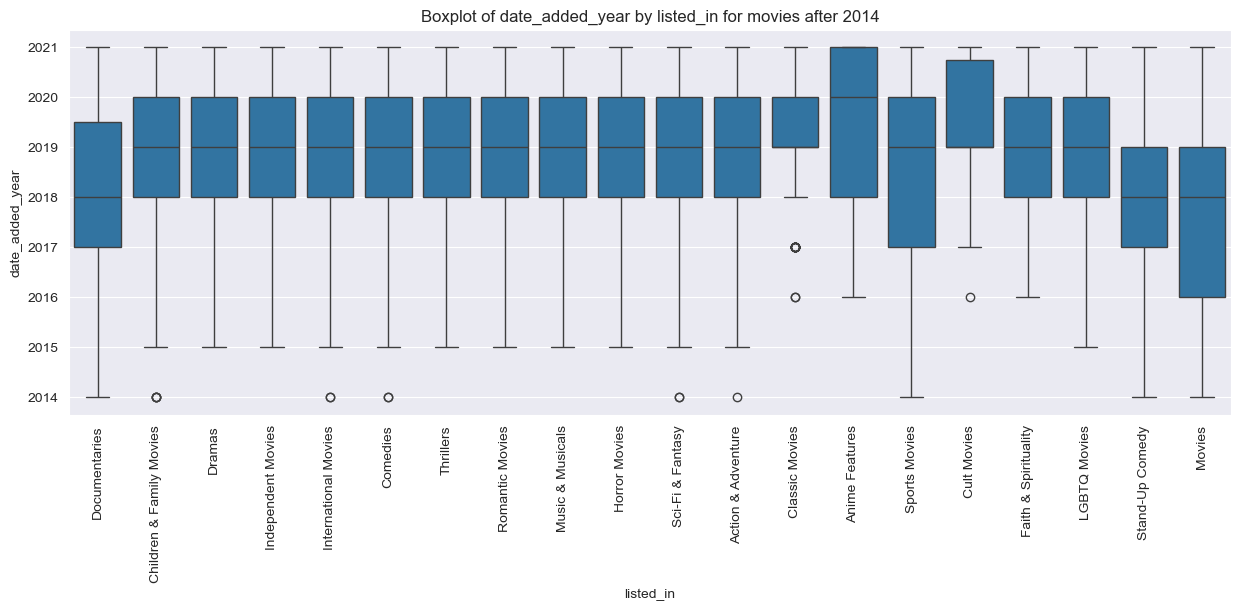

In [89]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df, x="listed_in", y="date_added_year")
plt.title("Boxplot of date_added_year by listed_in for movies after 2014")
plt.xticks(rotation=90);

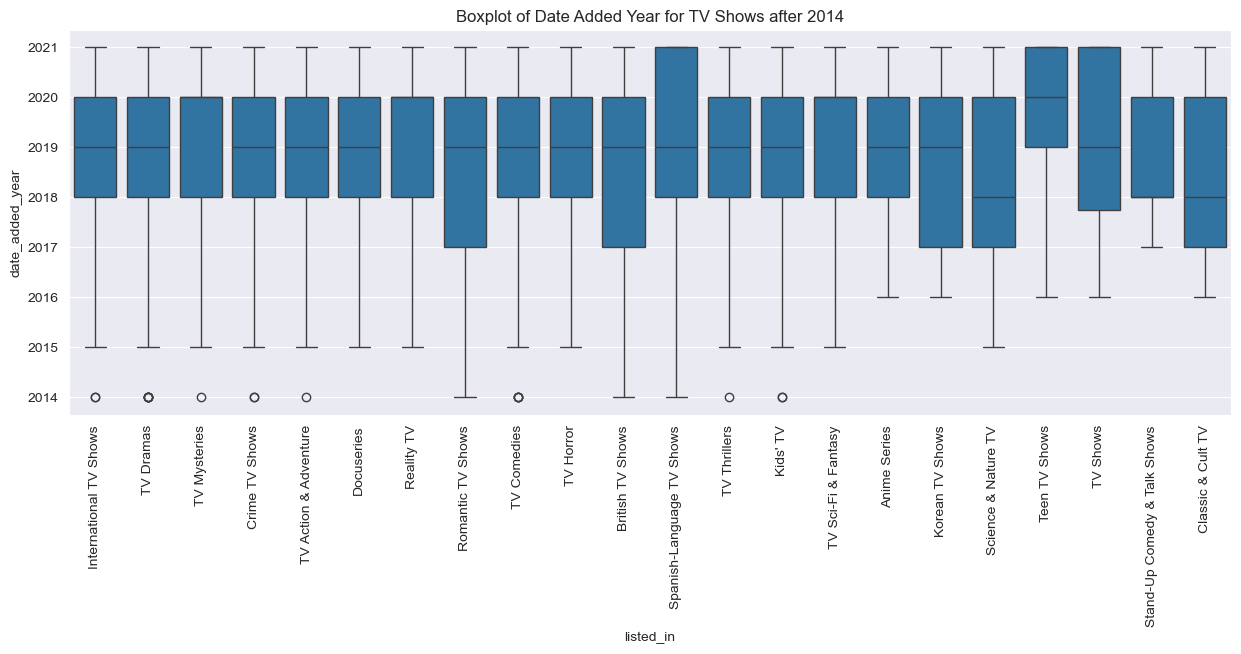

In [90]:
merge_df=tv_shows_df.merge(listed_df, on='show_id', how='inner')
merge_df = merge_df.loc[merge_df['date_added_year'] >= 2014]
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df, x="listed_in", y="date_added_year")
plt.title('Boxplot of Date Added Year for TV Shows after 2014')
plt.xticks(rotation=90);

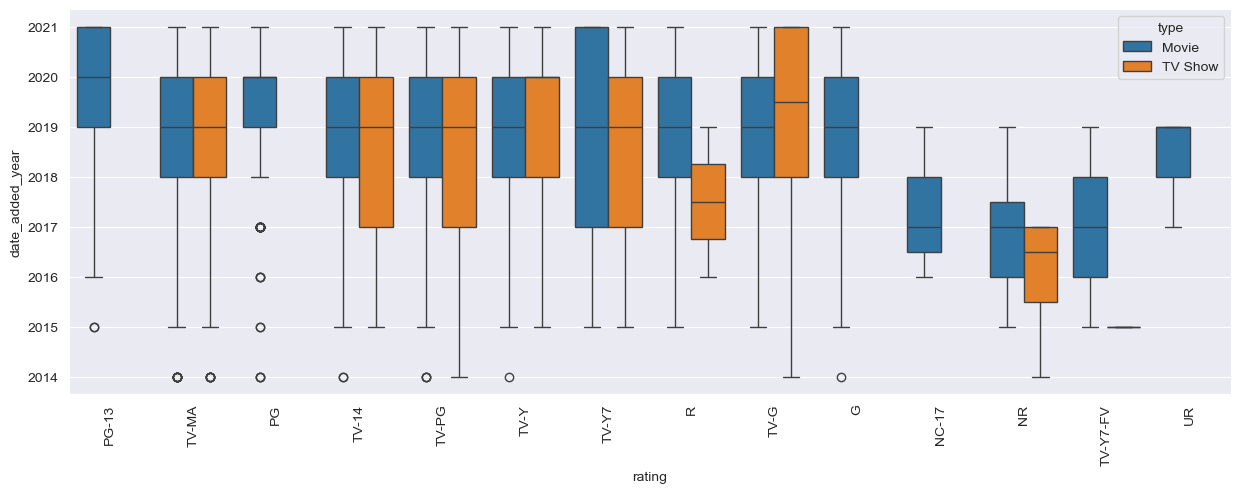

In [93]:

plt.figure(figsize=(15, 5))
rating_df = df.loc[df['date_added_year'] >= 2014]
sns.boxplot(data=rating_df, x="rating", y="date_added_year", hue="type")
plt.xticks(rotation=90);

In [8]:
merge_df=listed_df.merge(country_df, on='show_id', how='inner')

In [9]:
merge_df.describe()

,show_id,listed_in,country
count,23741,23741,23741
unique,8805,42,127
top,s1507,International Movies,United States
freq,24,3506,6779


In [11]:
merge_df.head(20)

,show_id,listed_in,country
0,s1,Documentaries,United States
1,s2,International TV Shows,South Africa
2,s2,TV Dramas,South Africa
3,s2,TV Mysteries,South Africa
4,s3,Crime TV Shows,Unknown
5,s3,International TV Shows,Unknown
6,s3,TV Action & Adventure,Unknown
7,s4,Docuseries,Unknown
8,s4,Reality TV,Unknown
9,s5,International TV Shows,India


In [54]:
gp=merge_df.groupby(["country","listed_in"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})
gp["rank"]=gp.groupby(["country"])["count"].rank(method="dense",ascending=False)
gp=gp.loc[gp["rank"] < 4].sort_values(by='country')

In [106]:
non_top_3_countrries = country_df["country"].value_counts()[4:20].index.tolist()

In [107]:
gp.loc[gp["country"].isin(non_top_3_countrries)].sort_values(by=["country","rank"], ascending=True)

,country,listed_in,count,rank
21,Argentina,International Movies,58,1.0
18,Argentina,Dramas,35,2.0
31,Argentina,Spanish-Language TV Shows,18,3.0
51,Australia,Dramas,38,1.0
56,Australia,International TV Shows,31,2.0
55,Australia,International Movies,30,3.0
132,Brazil,International Movies,43,1.0
129,Brazil,Dramas,26,2.0
133,Brazil,International TV Shows,26,2.0
125,Brazil,Comedies,20,3.0


In [95]:
duckdb.sql(""" 
           with cte as (
           SELECT
    country,
    listed_in,
           cnt,
    row_number() OVER (PARTITION BY country order by cnt desc) as rank
    FROM (
        select country, listed_in, count(*) cnt from merge_df group BY country, listed_in 
    ) 
           )
    select * from cte where rank < 4 and country = 'Canada'
""")

┌─────────┬──────────────────────────┬───────┬───────┐
│ country │        listed_in         │  cnt  │ rank  │
│ varchar │         varchar          │ int64 │ int64 │
├─────────┼──────────────────────────┼───────┼───────┤
│ Canada  │ Comedies                 │    94 │     1 │
│ Canada  │ Dramas                   │    82 │     2 │
│ Canada  │ Children & Family Movies │    80 │     3 │
└─────────┴──────────────────────────┴───────┴───────┘